<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/sentimentos/analise_with_vicuna_with_openchat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!nvidia-smi

Fri Jan 12 18:25:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.06              Driver Version: 545.29.06    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti     Off | 00000000:08:00.0  On |                  N/A |
|  0%   42C    P3              29W / 285W |   1212MiB / 12282MiB |     22%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
date = '2023-09-01'
filename = 'analisar.csv'
original = pd.read_csv(f"/content/gdrive/MyDrive/tcc/exploratoria/{date}-{filename}")

original.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar
17802,2023-07-07 00:42:48.125613,5.0,2 anos atrás,0,True,"Lugar lindíssimo, atendimento impecável, comid...",hotel-vila-galé---touros,16,2021-07-07,7,2021,2021-07,True,True,False,True,True
37410,2023-07-07 00:40:49.349217,5.0,4 meses atrás,0,False,Comida e atendimento excelente,iberostar-bahia,Um,2023-03-09,3,2023,2023-03,True,True,False,True,True
43411,2023-07-07 01:05:53.913963,5.0,4 anos atrás,0,False,Muito boa!!!,iberostar-bahia,56,2019-07-08,7,2019,2019-07,True,True,False,True,True
9453,2023-07-07 00:47:36.174245,1.0,9 meses atrás,1,True,O clube é muito longe do hotel. O hotel O serv...,nauticomar-resort-all-inclusive-_-beach-club,91,2022-10-10,10,2022,2022-10,True,True,False,True,True
35886,2023-07-07 00:46:17.407614,5.0,4 anos atrás,0,False,Maravilhosa!,hotel-vila-galé-marés,5,2019-07-08,7,2019,2019-07,True,True,False,True,True


In [3]:
# treinado = pd.read_csv(f"/content/gdrive/MyDrive/tcc/testando-classificacao.csv")

# treinado.sample(5)

In [4]:
bert = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_v2.csv", index_col = 0)

bert.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,depois_2017,analisar,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score
35461,2023-07-07 00:44:25.311238,5.0,4 anos atrás,0,False,Maravilhosa recomendo com certeza não tenho do...,hotel-vila-galé-marés,11,2019-07-08,7,...,True,True,"{'label': 'positive', 'score': 0.9811227321624...","{'label': 'positive', 'score': 0.8193078637123...","{'label': 'Positive', 'score': 0.9910194277763...","{'label': 'positive', 'score': 0.905832052230835}","{'label': 'Muito Positivo', 'score': 0.9612912...","[{'label': 'Positive', 'score': 0.991019427776...","['positive', 'muito positivo']","{0.9910194277763367, 0.9811227321624756, 0.819..."
34974,2023-07-07 00:42:19.054624,4.0,3 anos atrás,0,False,Belas praias. Cortesia dos funcionários. Varie...,hotel-vila-galé-marés,16,2020-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9063944220542...","{'label': 'positive', 'score': 0.9092527627944...","{'label': 'Negative', 'score': 0.81553715467453}","{'label': 'positive', 'score': 0.7971385717391...","{'label': 'Muito Positivo', 'score': 0.8750162...","[{'label': 'positive', 'score': 0.909252762794...","['positive', 'muito positivo', 'negative']","{0.9092527627944946, 0.9063944220542908, 0.797..."
48187,2023-07-07 01:01:05.246717,4.0,4 anos atrás,0,True,O benefício seria melhor se tudo fosse incluíd...,salinas-maragogi-all-inclusive-resort,145,2019-07-08,7,...,True,True,"{'label': 'negative', 'score': 0.593022346496582}","{'label': 'positive', 'score': 0.7363027930259...","{'label': 'Negative', 'score': 0.7630795836448...","{'label': 'negative', 'score': 0.8380320072174...","{'label': 'Neutro', 'score': 0.5405533313751221}","[{'label': 'negative', 'score': 0.838032007217...","['negative', 'positive', 'neutro']","{0.8380320072174072, 0.7630795836448669, 0.540..."
8927,2023-07-07 00:42:23.651080,5.0,5 anos atrás,0,True,Maravilhoso..principalmente com crianças,hotel-vila-galé_-eco-resort---cabo,79,2018-07-08,7,...,True,True,"{'label': 'positive', 'score': 0.9791610836982...","{'label': 'positive', 'score': 0.878081202507019}","{'label': 'Positive', 'score': 0.9929714798927...","{'label': 'positive', 'score': 0.9170756936073...","{'label': 'Muito Positivo', 'score': 0.9568936...","[{'label': 'Positive', 'score': 0.992971479892...","['positive', 'muito positivo']","{0.9929714798927307, 0.9791610836982727, 0.878..."
1557,2023-07-07 00:38:14.455138,4.0,4 anos atrás,0,True,"No geral muito bom, limpo, funcionários atenci...",hotel-marsol-beach-resort,26,2019-07-08,7,...,True,True,"{'label': 'negative', 'score': 0.571877121925354}","{'label': 'positive', 'score': 0.7576581835746...","{'label': 'Positive', 'score': 0.9905151128768...","{'label': 'positive', 'score': 0.9078407883644...","{'label': 'Positivo', 'score': 0.8421232104301...","[{'label': 'Positive', 'score': 0.990515112876...","['positive', 'positivo', 'negative']","{0.9905151128768921, 0.9078407883644104, 0.571..."


In [5]:
gpt = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_gpt.csv", index_col = 0)
gpt = gpt.rename(columns={"tokens": "tokens_gpt"})
gpt = gpt.reset_index(drop=True)
gpt.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_gpt,resultado_gpt,tokens_gpt
46440,2023-07-07 00:55:40.112769,5.0,um ano atrás,1,False,"Passei 5 dias com a minha família, tudo impecá...",salinas-maragogi-all-inclusive-resort,22,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,203
25860,2023-07-07 00:38:22.906179,5.0,6 meses atrás,0,False,Cana Accenture top e muito atenciosos,cana-brava-all-inclusive-resort,Um,2023-01-08,1,2023,2023-01,True,True,False,True,True,positive,2,104
25967,2023-07-07 00:38:37.470566,5.0,7 meses atrás,0,False,Muito bom. Ambiente muito agradável para crian...,cana-brava-all-inclusive-resort,5,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,136
12441,2023-07-07 00:45:40.699822,5.0,2 anos atrás,0,False,tudo muito bom,la-torre-resort-all-inclusive,52,2021-07-07,7,2021,2021-07,True,True,False,True,True,positive,2,97
9437,2023-07-07 00:47:33.077283,5.0,8 meses atrás,0,False,100 POR CENTO,nauticomar-resort-all-inclusive-_-beach-club,3,2022-11-09,11,2022,2022-11,True,True,False,True,True,positive,2,97


In [6]:
openchat = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_openchat.csv", index_col = 0)
openchat = openchat.rename(columns={"tokens": "tokens_openchat"})
openchat = openchat.reset_index(drop=True)
openchat.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_openchat,resultado_openchat,tokens_openchat
538,2023-07-07 00:35:12.100404,5.0,um ano atrás,0,False,Venho aqui mais uma vez parabenizar a equipe d...,hotel-marsol-beach-resort,2,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,173
43189,2023-07-07 01:04:30.983150,5.0,4 anos atrás,0,True,Maravilha maravilha,iberostar-bahia,47,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,121
4427,2023-07-07 00:54:29.373498,5.0,um ano atrás,0,False,"Incrível! Funcionários, quarto, instalações, e...",salinas-maceió-all-inclusive-resort,Um,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,160
10559,2023-07-07 00:50:42.071876,5.0,4 anos atrás,0,True,Ótimo vale a pena demais,nauticomar-resort-all-inclusive-_-beach-club,111,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,123
19272,2023-07-07 00:35:41.605245,3.0,um ano atrás,0,False,"Lugar bonito, porém atendimento péssimo, não t...",grand-oca-maragogi,3,2022-07-07,7,2022,2022-07,True,True,False,True,True,neutral,1,154


In [7]:
vicuna = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_vicuna.csv", index_col = 0)
vicuna = vicuna.rename(columns={"sentimento_gpt": "sentimento_vicuna", "resultado_gpt":  "resultado_vicuna", "tokens": "tokens_vicuna"})
vicuna = vicuna.reset_index(drop=True)
vicuna.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_vicuna,resultado_vicuna,tokens_vicuna
21769,2023-07-07 00:46:02.565863,5.0,2 anos atrás,0,True,Lugar ótimo para descanso e lazer com a familia,makai-resort-aracaju---all-inclusive,79,2021-07-07,7,2021,2021-07,True,True,False,True,True,positive,2,152
49216,2023-07-07 01:04:43.204325,5.0,5 anos atrás,0,True,Excelente Resort,salinas-maragogi-all-inclusive-resort,113,2018-07-08,7,2018,2018-07,True,True,False,True,True,positive,2,140
33319,2023-07-07 00:37:15.979608,5.0,um ano atrás,0,False,Porque a Tia Brilho estava lá !!! Qualidade do...,hotel-vila-galé-marés,Um,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,184
3416,2023-07-07 00:58:12.734578,5.0,4 anos atrás,0,True,Excelente resort. Tem uma infraestrutura muito...,transamerica-comandatuba,68,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,205
42500,2023-07-07 01:00:35.415775,5.0,4 anos atrás,0,False,"Muito bom, vale a pena conhecer.",iberostar-bahia,14,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,148


In [8]:
original.shape

(49219, 17)

In [9]:
bert.shape

(49219, 25)

In [10]:
gpt.shape

(49219, 20)

In [11]:
openchat.shape

(49219, 20)

In [12]:
vicuna.shape

(49219, 20)

In [13]:
values = original['text'].value_counts()
values[values < 5]

Ótimo lugar recomendo                                                                                                                                4
Está sendo ótima                                                                                                                                     4
Comida maravilhosa                                                                                                                                   4
Hotel excelente                                                                                                                                      4
Lindo.                                                                                                                                               4
                                                                                                                                                    ..
Melhor experiência que já vivi. Quartos: Não quero ir mais embora. Segurança: Sem me preocupar

In [14]:
texto_mascara = 'Ótimo lugar recomendo'

In [15]:
ocopy = original[original['text'] == texto_mascara].copy()

In [16]:
gcopy = gpt[gpt['text'] == texto_mascara].copy()

In [17]:
bcopy = bert[bert['text'] == texto_mascara].copy()

In [18]:
opccopy = openchat[openchat['text'] == texto_mascara].copy()

In [19]:
vcopy = vicuna[vicuna['text'] == texto_mascara].copy()

In [20]:
ocopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True


In [21]:
gcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_gpt,resultado_gpt,tokens_gpt
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,99
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,99
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,99
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,99


In [22]:
opccopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_openchat,resultado_openchat,tokens_openchat
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,120
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,120
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,120
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,120


In [23]:
bcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,depois_2017,analisar,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."


In [24]:
vcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_vicuna,resultado_vicuna,tokens_vicuna
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,142
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,142
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,142
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,142


In [25]:
original.shape

(49219, 17)

In [26]:
megazord_tmp = pd.merge(original, bert, how='left')
megazord_tmp2 = pd.merge(megazord_tmp, gpt, how='left')
megazord_tmp3 = pd.merge(megazord_tmp2, openchat, how='left')
megazord = pd.merge(megazord_tmp3, vicuna, how='left')

In [27]:
megazord = megazord.loc[:, ~megazord.columns.duplicated(keep='first')]

In [28]:
equal_columns = megazord.columns[megazord.nunique() == 1]

megazord = megazord.drop(columns=equal_columns)

# Reset index if needed
megazord = megazord.reset_index(drop=True)
megazord.columns

Index(['retrieval_date', 'rating', 'relative_date', 'likes',
       'user_is_local_guide', 'text', 'source', 'user_reviews',
       'data_avaliacao', 'mes_avaliacao', 'ano_avaliacao', 'mes_ano_avaliacao',
       'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3',
       'sentiment_bert_4', 'sentiment_bert_5', 'sentiment_bert',
       'sentiment_label', 'sentiment_score', 'sentimento_gpt', 'resultado_gpt',
       'tokens_gpt', 'sentimento_openchat', 'resultado_openchat',
       'tokens_openchat', 'sentimento_vicuna', 'resultado_vicuna',
       'tokens_vicuna'],
      dtype='object')

In [29]:
megazord.shape

(49219, 29)

In [30]:
megazord = megazord.reset_index(drop=True)

In [31]:
megazord[megazord['text'] == texto_mascara]

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentiment_score,sentimento_gpt,resultado_gpt,tokens_gpt,sentimento_openchat,resultado_openchat,tokens_openchat,sentimento_vicuna,resultado_vicuna,tokens_vicuna
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142


In [32]:
megazord[megazord['text'] == 'Lugar fantástico, recomendo super.']

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentiment_score,sentimento_gpt,resultado_gpt,tokens_gpt,sentimento_openchat,resultado_openchat,tokens_openchat,sentimento_vicuna,resultado_vicuna,tokens_vicuna
0,2023-07-07 00:33:49.096786,5.0,10 horas atrás,0,False,"Lugar fantástico, recomendo super.",hotel-marsol-beach-resort,9,2023-07-06,7,...,"{0.9925462603569031, 0.9849022030830383, 0.936...",positive,2,102,positive,2,124,positive,2,147


# 08

## bert

In [33]:
PRE_TRAINED_MODEL_NAME_1 = 'philschmid/distilbert-base-multilingual-cased-sentiment'
PRE_TRAINED_MODEL_NAME_2 = 'lxyuan/distilbert-base-multilingual-cased-sentiments-student'
PRE_TRAINED_MODEL_NAME_3 = 'citizenlab/twitter-xlm-roberta-base-sentiment-finetunned'
PRE_TRAINED_MODEL_NAME_4 = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'
PRE_TRAINED_MODEL_NAME_5 = 'ramonmedeiro1/bertimbau-products-reviews-pt-br'
teste = megazord.copy()
MODELS = [PRE_TRAINED_MODEL_NAME_1,PRE_TRAINED_MODEL_NAME_2,PRE_TRAINED_MODEL_NAME_3,PRE_TRAINED_MODEL_NAME_4,PRE_TRAINED_MODEL_NAME_5]

GPT_LABEL = ['negative', 'neutral', 'positive', 'unknown']

translate = {"muito positivo": "positive", "muito negativo": "negative", "neutro": "neutral", "negativo": "negative", "positivo": "positive"}

In [34]:
translate['muito positivo']

'positive'

In [35]:
def traduzir_bert_5(row):
  row = ast.literal_eval(row)
  value = row['label'].lower()
  score = row['score']
  label = translate[value]
  return {'label': label, 'score': score}

def lower_bert_3(row):
  row = ast.literal_eval(row)
  label = row['label'].lower()
  score = row['score']
  return {'label': label, 'score': score}

In [36]:
import ast

def try_parse(x):
  if type(x) == str:
    return ast.literal_eval(x)
  return x

In [37]:
columns_to_transform = ['sentiment_bert_1','sentiment_bert_2','sentiment_bert_3','sentiment_bert_4','sentiment_bert_5']

In [38]:
teste['sentiment_bert_5'] = teste['sentiment_bert_5'].apply(traduzir_bert_5)
teste['sentiment_bert_3'] = teste['sentiment_bert_3'].apply(lower_bert_3)

In [39]:
cols = columns_to_transform
teste['sentiment_bert_1'] = teste['sentiment_bert_1'].apply(lambda x: try_parse(x))
teste['sentiment_bert_2'] = teste['sentiment_bert_2'].apply(lambda x: try_parse(x))
teste['sentiment_bert_3'] = teste['sentiment_bert_3'].apply(lambda x: try_parse(x))
teste['sentiment_bert_4'] = teste['sentiment_bert_4'].apply(lambda x: try_parse(x))
teste['sentiment_bert_5'] = teste['sentiment_bert_5'].apply(lambda x: try_parse(x))
teste['sentiment_bert'] = teste[cols].apply(lambda row: row.values.tolist(), axis=1)

In [40]:
teste[['sentiment_bert']].sample(10)

,sentiment_bert
43102,"[{'label': 'positive', 'score': 0.706554055213..."
6821,"[{'label': 'positive', 'score': 0.971209764480..."
11813,"[{'label': 'positive', 'score': 0.956834495067..."
5999,"[{'label': 'negative', 'score': 0.895868182182..."
28925,"[{'label': 'positive', 'score': 0.992603003978..."
35379,"[{'label': 'neutral', 'score': 0.5660210251808..."
24098,"[{'label': 'positive', 'score': 0.986198782920..."
35904,"[{'label': 'negative', 'score': 0.943050324916..."
36578,"[{'label': 'positive', 'score': 0.982211887836..."
3178,"[{'label': 'positive', 'score': 0.558363437652..."


In [41]:
try_parse(teste.iloc[40522]['sentiment_bert'])

[{'label': 'positive', 'score': 0.9965198040008545},
 {'label': 'positive', 'score': 0.9393256306648254},
 {'label': 'positive', 'score': 0.9923418760299683},
 {'label': 'positive', 'score': 0.931358277797699},
 {'label': 'positive', 'score': 0.9673769474029541}]

In [42]:
import numpy as np

teste['sentiment_bert_max'] = teste['sentiment_bert'].apply(lambda x: MODELS[np.argmax(list(map(lambda y: y['score'], x)))])

In [43]:
teste[teste['text'] == texto_mascara][['ano_avaliacao', 'source', 'text', 'sentiment_bert', 'sentiment_label', 'sentiment_score', 'sentiment_bert_max']]

,ano_avaliacao,source,text,sentiment_bert,sentiment_label,sentiment_score,sentiment_bert_max
7481,2020,hotel-vila-galé_-eco-resort---cabo,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
10469,2020,nauticomar-resort-all-inclusive-_-beach-club,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
31001,2019,cana-brava-all-inclusive-resort,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
32911,2022,hotel-vila-galé-marés,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...


In [44]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

teste['sentiment_label'] = teste['sentiment_bert'].apply(lambda x: f7(list(map(lambda y: y['label'].lower(), x))))
teste['sentiment_score'] = teste['sentiment_bert'].apply(lambda x: set(map(lambda y: y['score'], x)))

In [45]:
teste[teste['text'] == texto_mascara][['ano_avaliacao', 'source', 'text', 'sentiment_bert', 'sentiment_label', 'sentiment_score', 'sentiment_bert_max']]

,ano_avaliacao,source,text,sentiment_bert,sentiment_label,sentiment_score,sentiment_bert_max
7481,2020,hotel-vila-galé_-eco-resort---cabo,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
10469,2020,nauticomar-resort-all-inclusive-_-beach-club,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
31001,2019,cana-brava-all-inclusive-resort,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
32911,2022,hotel-vila-galé-marés,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...


In [46]:
teste['sentiment_label']

0                  [positive]
1        [positive, negative]
2                  [positive]
3                  [positive]
4                  [positive]
                 ...         
49214    [positive, negative]
49215     [positive, neutral]
49216              [positive]
49217              [positive]
49218              [positive]
Name: sentiment_label, Length: 49219, dtype: object

In [47]:
teste[teste.text == 'Lindo d mais']

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentimento_gpt,resultado_gpt,tokens_gpt,sentimento_openchat,resultado_openchat,tokens_openchat,sentimento_vicuna,resultado_vicuna,tokens_vicuna,sentiment_bert_max
5962,2023-07-07 00:59:10.935631,3.0,5 anos atrás,0,True,Lindo d mais,salinas-maceió-all-inclusive-resort,13,2018-07-08,7,...,positive,2,97,positive,2,117,positive,2,140,citizenlab/twitter-xlm-roberta-base-sentiment-...


In [48]:
def translate_bert_label(x):
  max_item = max(x, key=lambda x: x['score'])
  highest_score_label = max_item['label']
  return highest_score_label

In [49]:
data_sample = [{'label': 'positive', 'score': 0.8852595686912537}, {'label': 'Neutral', 'score': 0.7905126214027405}, {'label': 'Muito Positivo', 'score': 0.9027421951293945}, {'label': 'positive', 'score': 0.5404698252677917}, {'label': 'negative', 'score': 0.44150814414024353}]

In [50]:
translate_bert_label(data_sample)

'Muito Positivo'

In [51]:
teste['gpt_label'] = teste['resultado_gpt'].apply(lambda x: GPT_LABEL[x])
teste['vicuna_label'] = teste['resultado_vicuna'].apply(lambda x: GPT_LABEL[x])
teste['openchat_label'] = teste['resultado_openchat'].apply(lambda x: GPT_LABEL[x])
teste['bert_label'] = teste['sentiment_bert'].apply(lambda x: translate_bert_label(x))
teste['citizenlab_bert_label'] = teste['sentiment_bert_3'].apply(lambda x: x['label'])
teste['philschmid_bert_label'] = teste['sentiment_bert_1'].apply(lambda x: x['label'])
teste['bert_gpt_match'] = teste['bert_label'] == teste['gpt_label']
teste['openchat_gpt_match'] = teste['openchat_label'] == teste['gpt_label']
teste['openchat_bert_match'] = teste['openchat_label'] == teste['bert_label']
teste['vicuna_gpt_match'] = teste['vicuna_label'] == teste['gpt_label']
teste['vicuna_bert_match'] = teste['vicuna_label'] == teste['bert_label']
teste['vicuna_openchat_match'] = teste['vicuna_label'] == teste['openchat_label']
teste['citizenlab_gpt_match'] = teste['citizenlab_bert_label'] == teste['gpt_label']
teste['philschmid_gpt_match'] = teste['philschmid_bert_label'] == teste['gpt_label']

In [52]:
# teste.to_csv('/content/gdrive/MyDrive/tcc/bert/analise_sentimento_2024_01_09.csv')

In [53]:
# teste = pd.read_csv('/content/gdrive/MyDrive/tcc/bert/analise_sentimento_2023_10_31.csv', index_col=0)

In [54]:
teste.columns

Index(['retrieval_date', 'rating', 'relative_date', 'likes',
       'user_is_local_guide', 'text', 'source', 'user_reviews',
       'data_avaliacao', 'mes_avaliacao', 'ano_avaliacao', 'mes_ano_avaliacao',
       'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3',
       'sentiment_bert_4', 'sentiment_bert_5', 'sentiment_bert',
       'sentiment_label', 'sentiment_score', 'sentimento_gpt', 'resultado_gpt',
       'tokens_gpt', 'sentimento_openchat', 'resultado_openchat',
       'tokens_openchat', 'sentimento_vicuna', 'resultado_vicuna',
       'tokens_vicuna', 'sentiment_bert_max', 'gpt_label', 'vicuna_label',
       'openchat_label', 'bert_label', 'citizenlab_bert_label',
       'philschmid_bert_label', 'bert_gpt_match', 'openchat_gpt_match',
       'openchat_bert_match', 'vicuna_gpt_match', 'vicuna_bert_match',
       'vicuna_openchat_match', 'citizenlab_gpt_match',
       'philschmid_gpt_match'],
      dtype='object')

### distribuição individual dos modelos

#### GPT

In [55]:
teste['gpt_label'].value_counts()

positive    41721
negative     4592
unknown      1803
neutral      1103
Name: gpt_label, dtype: int64

<Axes: ylabel='gpt_label'>

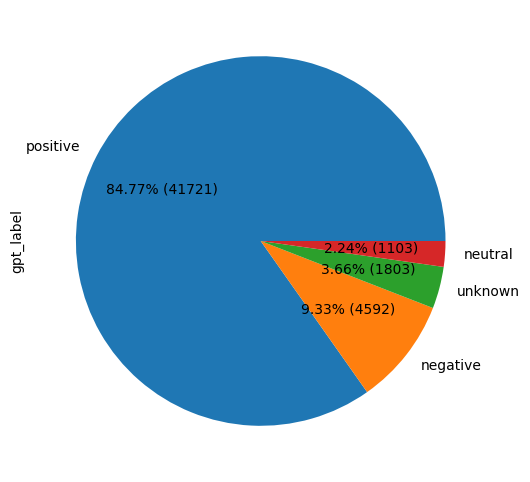

In [56]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(6, 6))
teste['gpt_label'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

<Axes: xlabel='ano_avaliacao', ylabel='count'>

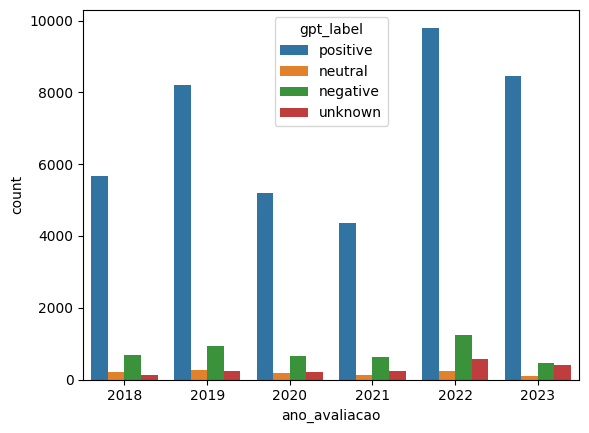

In [57]:
import seaborn as sns
sns.countplot(x='ano_avaliacao', hue='gpt_label', data=teste)

#### Vicuna

8h executando

In [58]:
teste['vicuna_label'].value_counts()

positive    42394
negative     2751
neutral      2328
unknown      1746
Name: vicuna_label, dtype: int64

<Axes: ylabel='vicuna_label'>

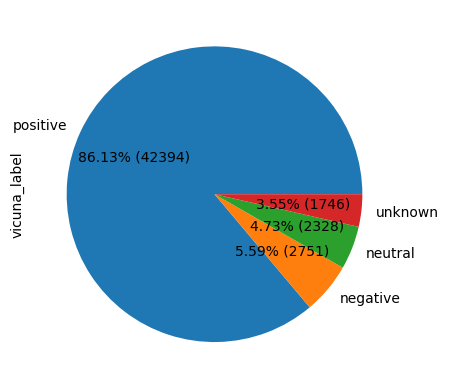

In [59]:
teste['vicuna_label'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

<Axes: xlabel='ano_avaliacao', ylabel='count'>

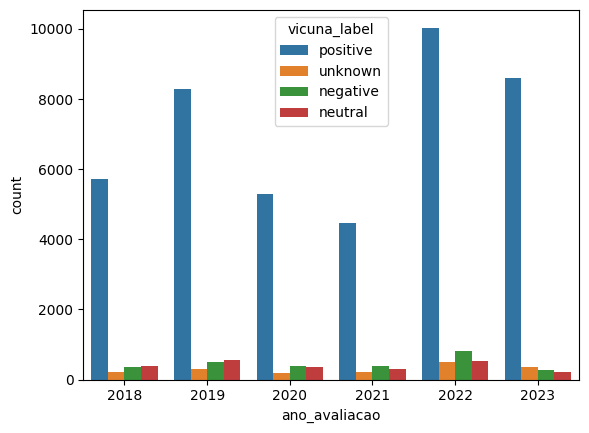

In [60]:
sns.countplot(x='ano_avaliacao', hue='vicuna_label', data=teste)

#### openchat

In [60]:
teste['openchat_label'].value_counts()

positive    40818
unknown      5568
neutral      2080
negative      753
Name: openchat_label, dtype: int64

<Axes: ylabel='openchat_label'>

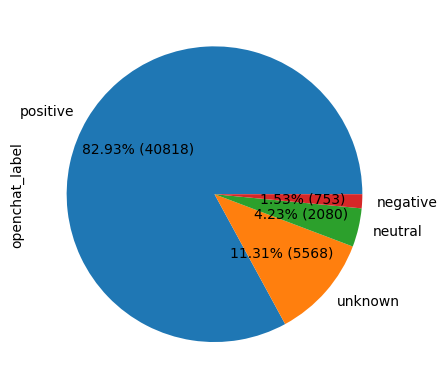

In [61]:
teste['openchat_label'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

<Axes: xlabel='ano_avaliacao', ylabel='count'>

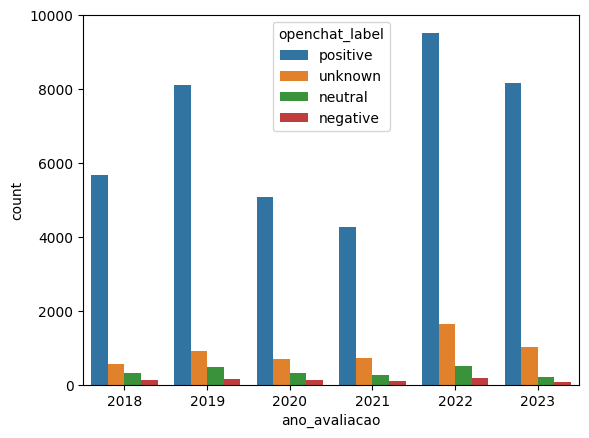

In [62]:
sns.countplot(x='ano_avaliacao', hue='openchat_label', data=teste)

#### berts

<Axes: ylabel='bert_label'>

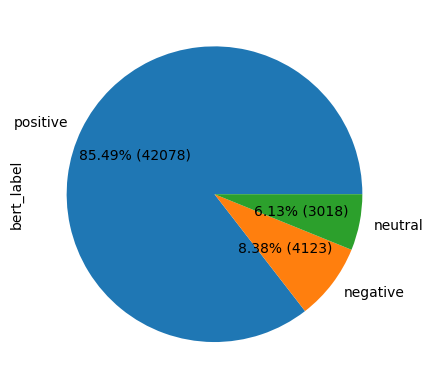

In [63]:
teste['bert_label'].value_counts().plot.pie(y='bert_label', autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

<Axes: ylabel='citizenlab_gpt_match'>

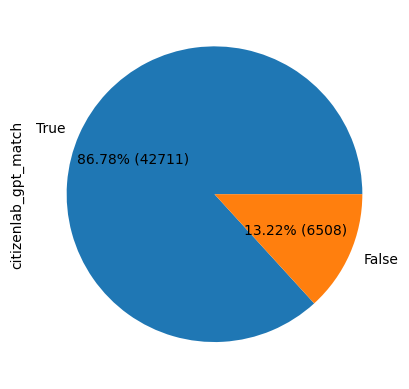

In [64]:
teste['citizenlab_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

<Axes: ylabel='philschmid_gpt_match'>

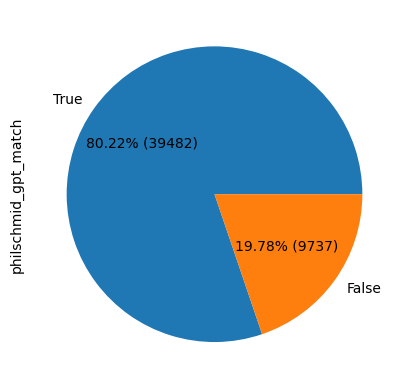

In [65]:
teste['philschmid_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

### distribuição da classificação dois a dois

In [63]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
    from matplotlib import pyplot as plt
    import seaborn as sns
    import pandas as pd

    plt.subplots(figsize=(8 * figscale, 8 * figscale))

    # Create a 2D histogram DataFrame
    df_2dhist = pd.DataFrame({
        x_label: grp[y_colname].value_counts()
        for x_label, grp in df.groupby(x_colname)
    })

    # Create the heatmap
    sns.heatmap(df_2dhist, cmap=mpl_palette_name, annot=True, fmt='.0f')  # Set annot=True for annotations, fmt='d' for integer values

    plt.xlabel(x_colname)
    plt.ylabel(y_colname)

    return autoviz.MplChart.from_current_mpl_state()

#### GPT vs bert por ano

In [67]:
import numpy as np
from google.colab import autoviz

def heatmap2(df, ano, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
    return heatmap(df[df['ano_avaliacao'] == ano], x_colname, y_colname, figscale, mpl_palette_name)

##### 2018

In [68]:
heatmap2(teste, 2018, 'gpt_label', 'bert_label')

##### 2019

In [69]:
heatmap2(teste, 2019, 'gpt_label', 'bert_label')

##### 2020

In [ ]:
heatmap2(teste, 2020, 'gpt_label', 'bert_label')

##### 2021

In [ ]:
heatmap2(teste, 2021, 'gpt_label', 'bert_label')

##### 2022

In [ ]:
heatmap2(teste, 2022, 'gpt_label', 'bert_label')

##### 2023

In [ ]:
heatmap2(teste, 2023, 'gpt_label', 'bert_label')

In [ ]:
heatmap(teste, 'gpt_label', 'bert_label')

In [ ]:
dfff = pd.DataFrame({
    (x_label, bert_label): grp['bert_label'].value_counts()
    for (x_label, bert_label), grp in teste.groupby(['ano_avaliacao', 'gpt_label'])
})

In [ ]:
heatmap2(teste, 'vicuna_label', 'openchat_label')

#### GPT e vicuna

<Axes: ylabel='vicuna_gpt_match'>

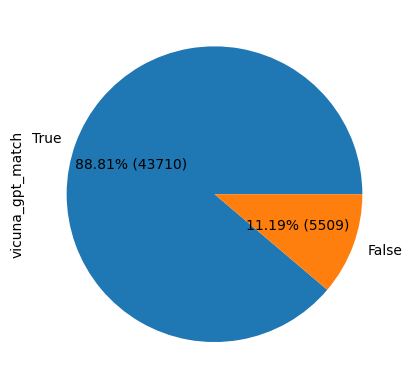

In [70]:
teste['vicuna_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

In [68]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', 2000,
                       'display.float_format', '{:20,.2f}'.format,
                       'display.max_colwidth', None):
  display(pd.DataFrame({
      vicuna_label: grp['gpt_label'].value_counts()/49219*100
      for vicuna_label, grp in teste.groupby('vicuna_label')
  }))

,negative,neutral,positive,unknown
negative,4.96,2.13,1.01,1.24
neutral,0.02,1.07,0.98,0.17
positive,0.09,1.05,82.13,1.50
unknown,0.52,0.49,2.01,0.65


In [59]:
teste.shape

(49219, 44)

In [55]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', 2000,
                       'display.float_format', '{:20,.2f}'.format,
                       'display.max_colwidth', None):
  display(pd.DataFrame({
      (x_label, vicuna_label): grp['gpt_label'].value_counts()
      for (x_label, vicuna_label), grp in teste.groupby(['ano_avaliacao', 'vicuna_label'])
  }))

2018                              2019                              2020                              2021                              2022                                          2023                         
         negative neutral positive unknown negative neutral positive unknown negative neutral positive unknown negative neutral positive unknown negative neutral positive unknown             negative neutral positive unknown
negative      335     160       86      90      441     257      115     118      366     171       54      75      350     133       59      79      717     244      127     161               231.00      82       56      85
neutral         3     110       69      20        4     136      104      15        2      86       85       5        1      65       47       5        1      94      121      23                  NaN      36       57      14
positive        8      95     5490      86       15     124     7948     127        6      77     5039      72        2      58     4226      78        9      97     9499     199                 3.00      64     8223     176
unknown        22      20       66      18       34      36      132      39       20      26      121      31       42      35      129      41       94      81      289     110                45.00      41      252      79

In [71]:
heatmap(teste, *['gpt_label', 'vicuna_label'], **{})

In [ ]:
teste

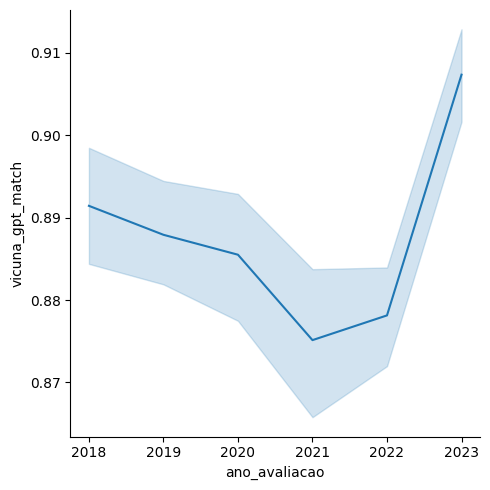

In [ ]:
sns.relplot(x='ano_avaliacao', y='vicuna_gpt_match', kind="line", data=teste)

#### GPT e openchat

<Axes: ylabel='openchat_gpt_match'>

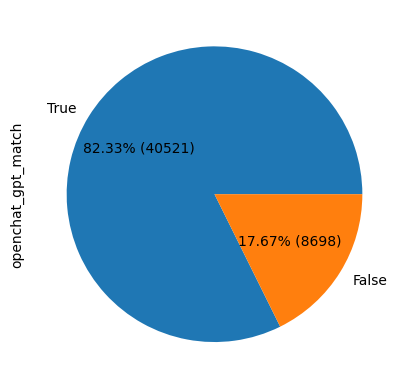

In [ ]:
teste['openchat_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

In [ ]:
heatmap(teste, *['gpt_label', 'openchat_label'], **{})

In [65]:
heatmap(teste, *['bert_label', 'openchat_label'], **{})

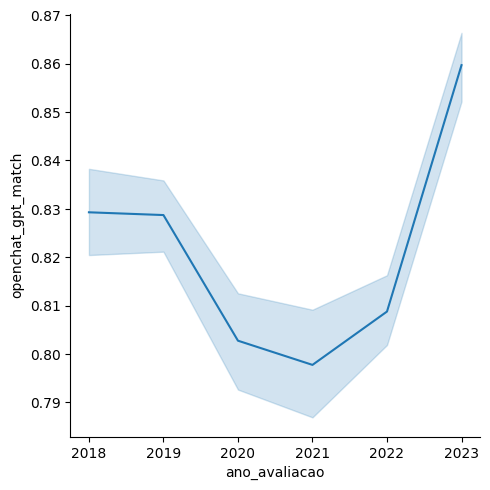

In [ ]:
sns.relplot(x='ano_avaliacao', y='openchat_gpt_match', kind="line", data=teste)

#### vicuna e openchat

<Axes: ylabel='vicuna_openchat_match'>

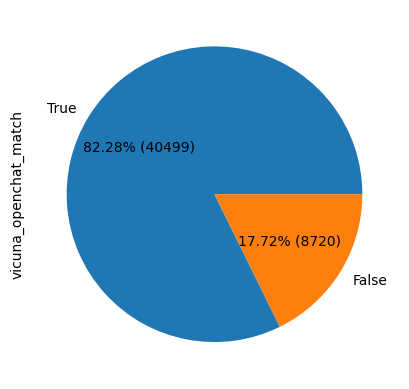

In [ ]:
teste['vicuna_openchat_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

In [ ]:
heatmap(teste, *['vicuna_label', 'openchat_label'], **{})

#### BERTS

<Axes: xlabel='ano_avaliacao', ylabel='count'>

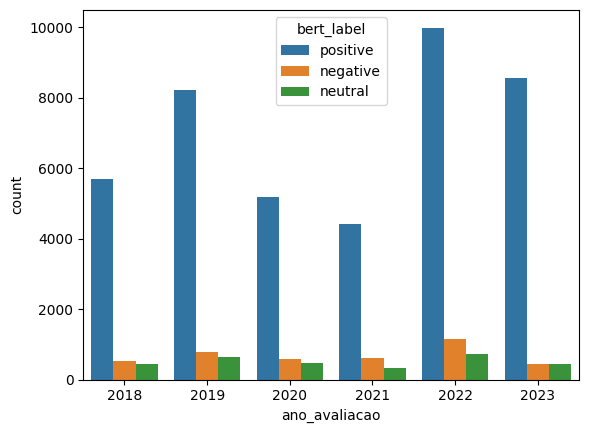

In [ ]:
sns.countplot(x='ano_avaliacao', hue='bert_label', data=teste)

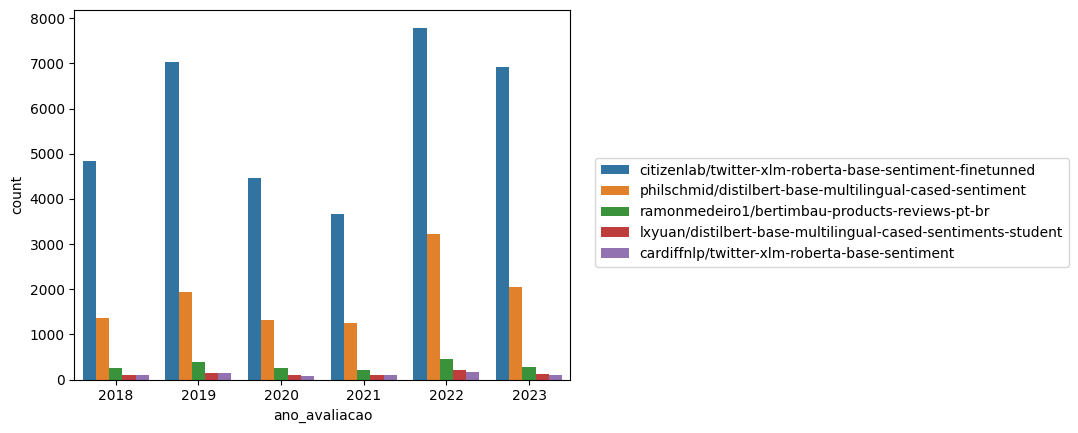

In [ ]:
sns.countplot(x='ano_avaliacao',
              hue='sentiment_bert_max',
              data=teste)
plt.legend(bbox_to_anchor=(1.05, .6), loc='upper left', borderaxespad=0)

<Axes: xlabel='ano_avaliacao', ylabel='count'>

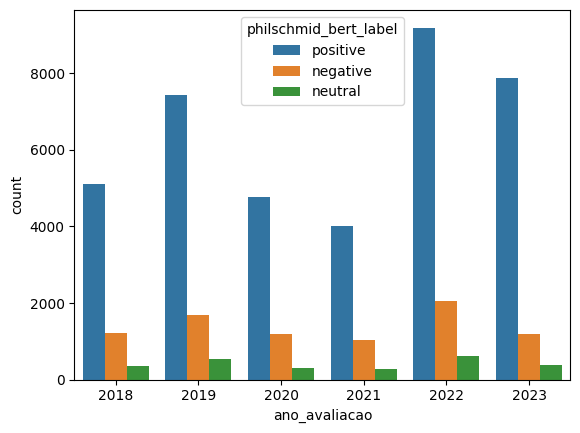

In [ ]:
sns.countplot(x='ano_avaliacao', hue='philschmid_bert_label', data=teste)

<Axes: xlabel='ano_avaliacao', ylabel='count'>

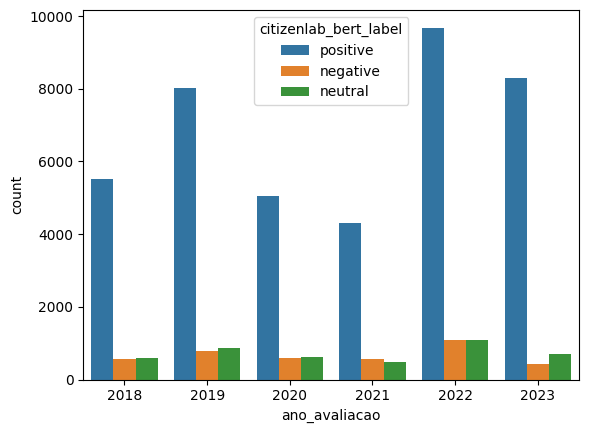

In [ ]:
sns.countplot(x='ano_avaliacao', hue='citizenlab_bert_label', data=teste)

<Axes: ylabel='bert_gpt_match'>

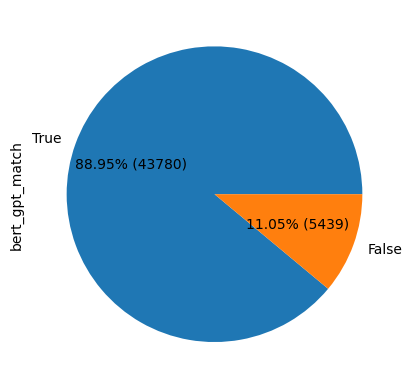

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

teste['bert_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

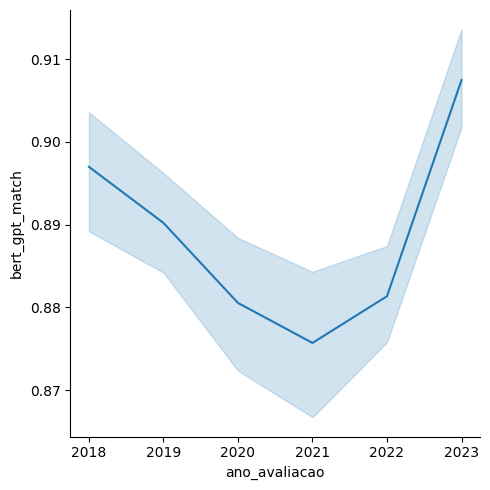

In [ ]:
sns.relplot(x='ano_avaliacao', y='bert_gpt_match', kind="line", data=teste)

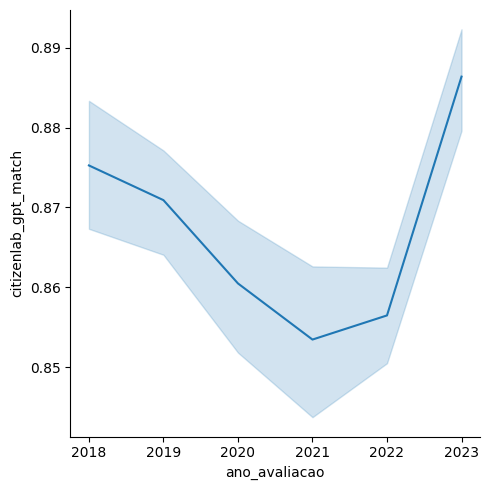

In [ ]:
sns.relplot(x='ano_avaliacao', y='citizenlab_gpt_match', kind="line", data=teste)

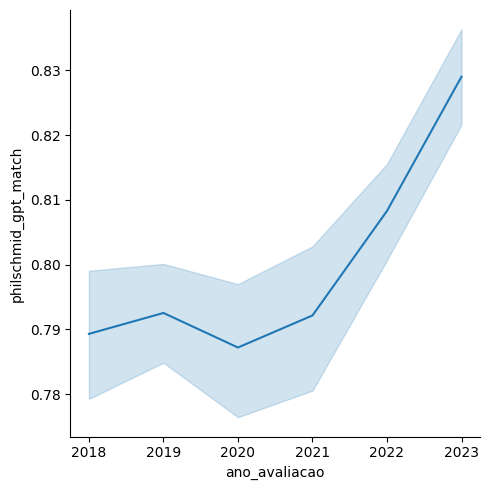

In [ ]:
sns.relplot(x='ano_avaliacao', y='philschmid_gpt_match', kind="line", data=teste)

In [ ]:
heatmap(teste, *['gpt_label', 'bert_label'], **{})

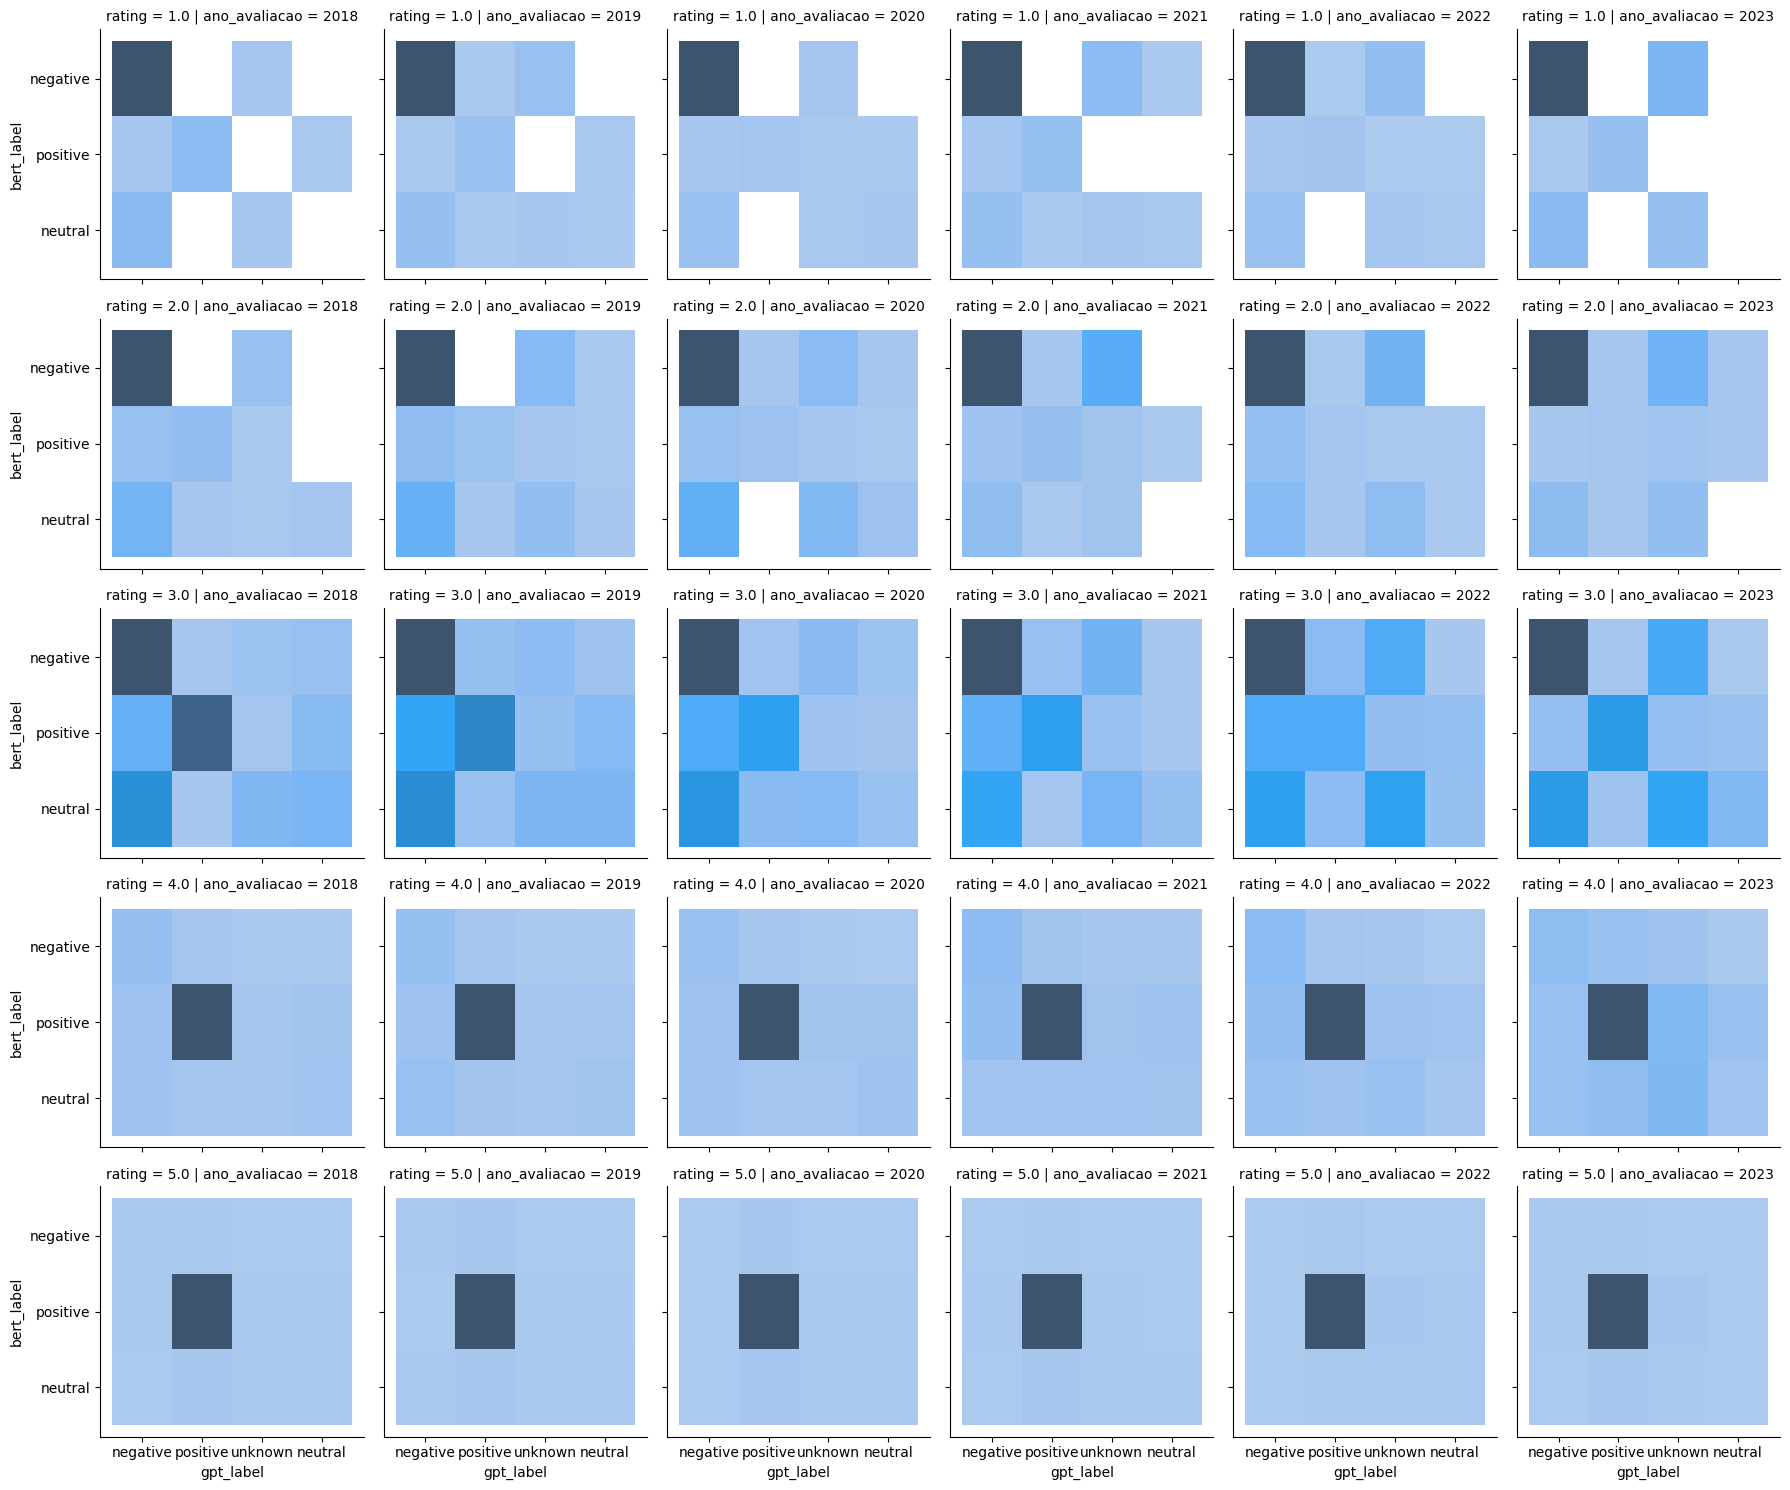

In [ ]:
# sns.FacetGrid?

g = sns.FacetGrid(teste, col="ano_avaliacao", row="rating")
g.map_dataframe(sns.histplot, x="gpt_label", y='bert_label')

#### consistencia da classificacao com o GPT

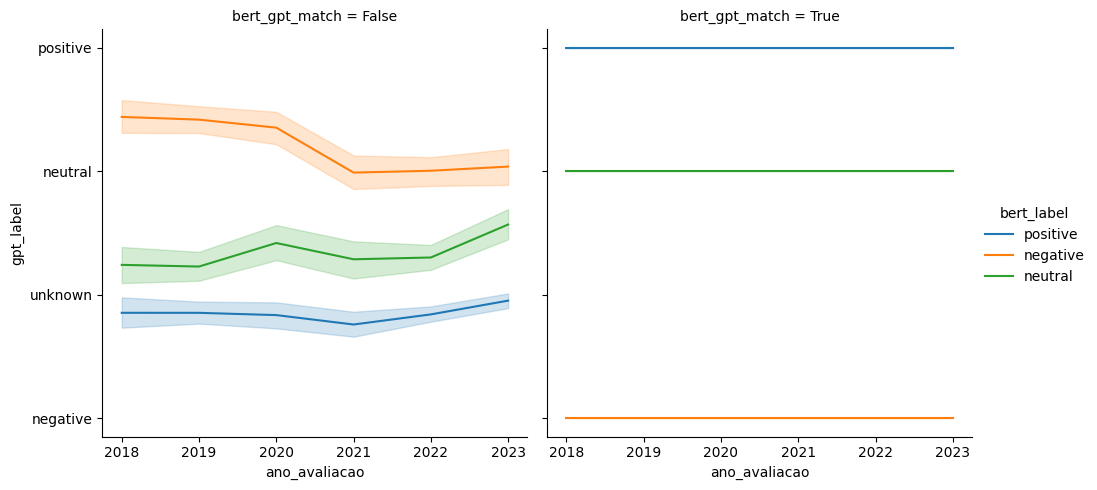

In [ ]:
sns.relplot(x='ano_avaliacao', y='gpt_label', hue='bert_label', col="bert_gpt_match", data=teste, kind='line')

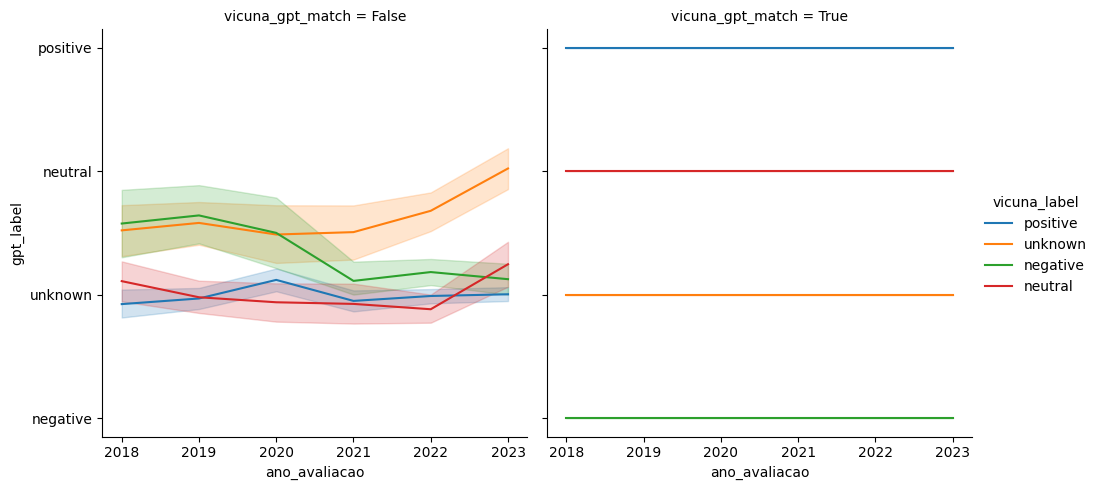

In [ ]:
sns.relplot(x='ano_avaliacao', y='gpt_label', hue='vicuna_label', col="vicuna_gpt_match", data=teste, kind='line')

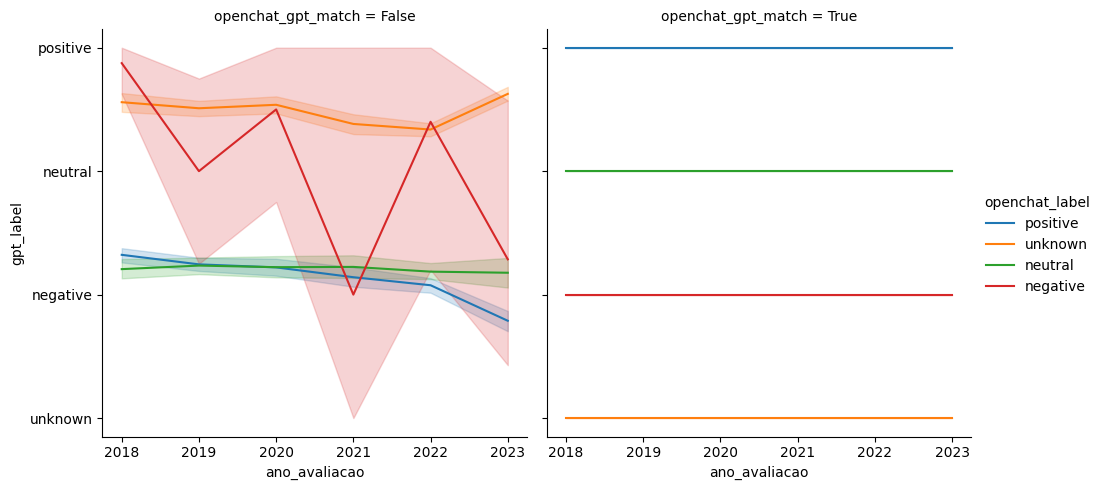

In [ ]:
para você foi atribuida a tarefa de classificar o sentimento de sentenças em português que são avaliações de hoteis, classifique-as em 2, 1 e 0 sem necessidade de justificativasns.relplot(x='ano_avaliacao', y='gpt_label', hue='openchat_label', col="openchat_gpt_match", data=teste, kind='line')

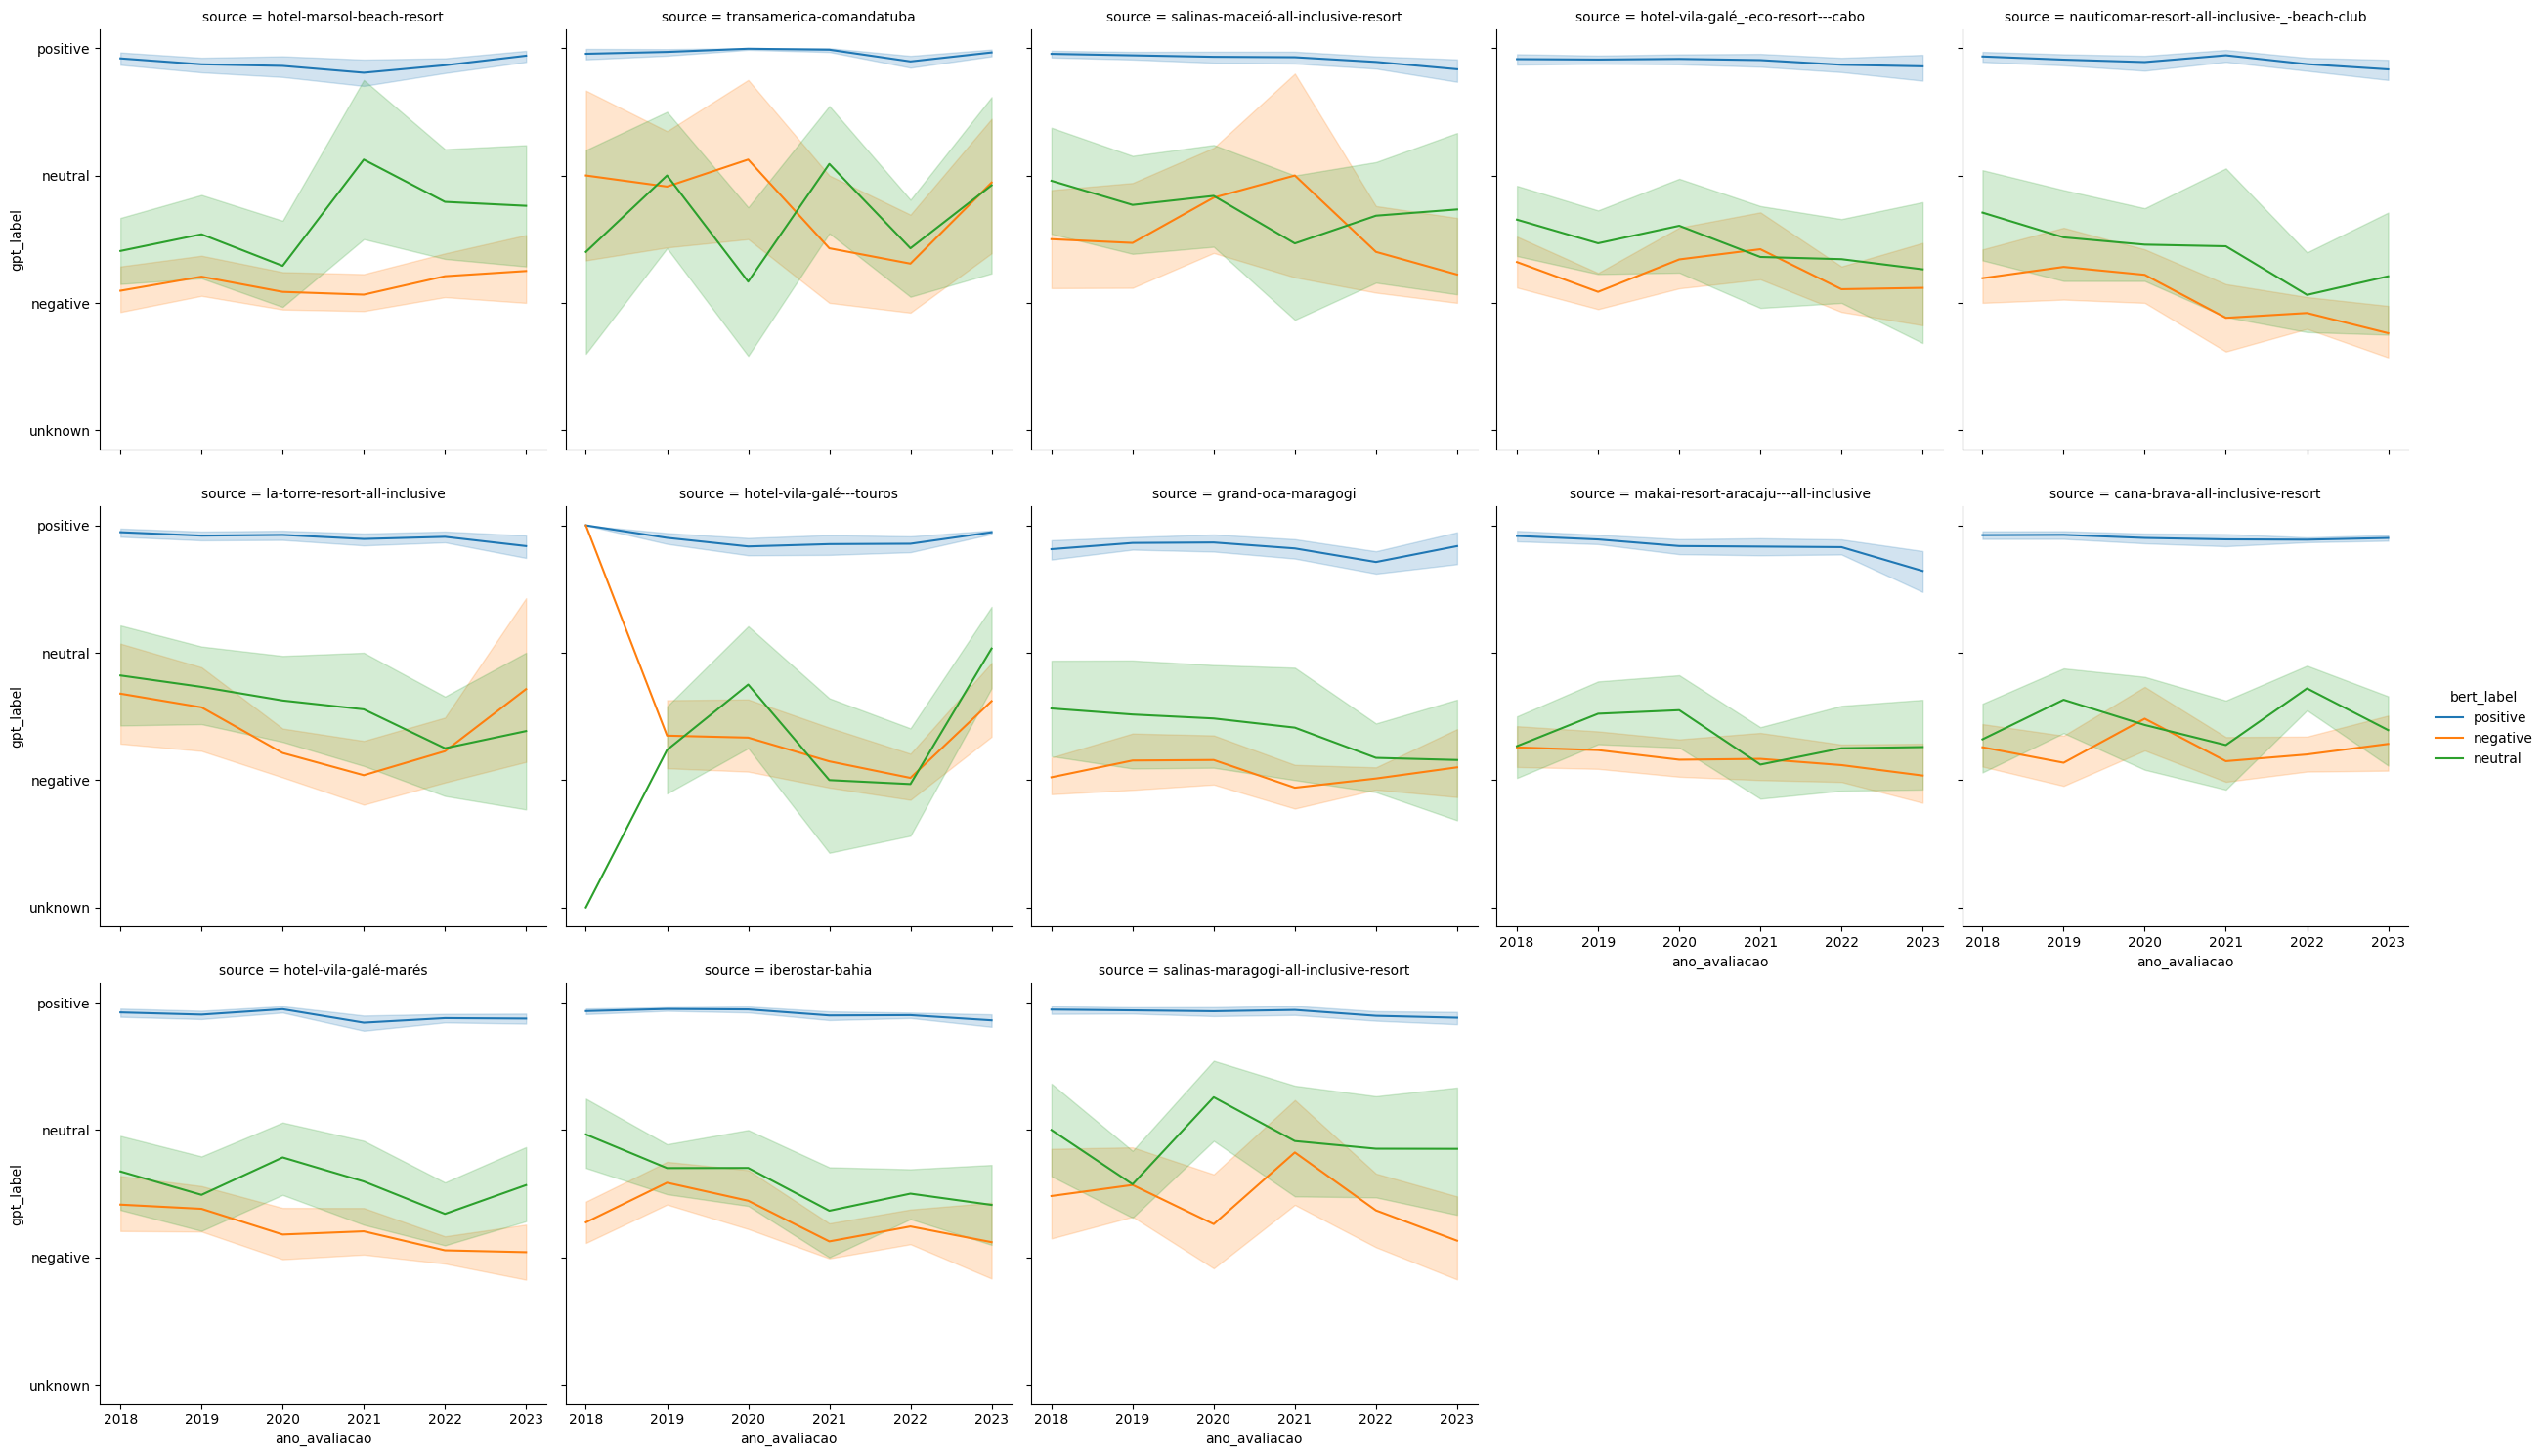

In [ ]:
sns.relplot(x='ano_avaliacao', col_wrap=5, col="source", y='gpt_label', hue='bert_label', data=teste, kind='line')

### inconsistencia do openchat

In [ ]:
teste[teste.text == 'Sem palavras'][['relative_date', 'likes', 'mes_ano_avaliacao', 'sentiment_label', 'sentiment_bert', 'rating', 'text', 'source', 'gpt_label','vicuna_label','openchat_label']]

,relative_date,likes,mes_ano_avaliacao,sentiment_label,sentiment_bert,rating,text,source,gpt_label,vicuna_label,openchat_label
39,3 semanas atrás,0,2023-06,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-marsol-beach-resort,neutral,positive,positive
5932,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maceió-all-inclusive-resort,neutral,positive,positive
14076,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,la-torre-resort-all-inclusive,neutral,positive,positive
14548,2 semanas atrás,0,2023-06,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-vila-galé---touros,neutral,positive,positive
35522,4 anos atrás,0,2019-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-vila-galé-marés,neutral,positive,neutral
48076,4 anos atrás,1,2019-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maragogi-all-inclusive-resort,neutral,positive,neutral
48708,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maragogi-all-inclusive-resort,neutral,positive,positive


### Tokens

In [ ]:
teste_copy = teste.copy()

In [ ]:
teste_copy[['tokens_vicuna', 'tokens_gpt', 'tokens_openchat']]

,tokens_vicuna,tokens_gpt,tokens_openchat
0,147,102,124
1,141,97,116
2,139,95,117
3,140,96,117
4,140,97,117
...,...,...,...
49214,186,136,167
49215,140,96,117
49216,140,96,119
49217,150,106,127


<Axes: >

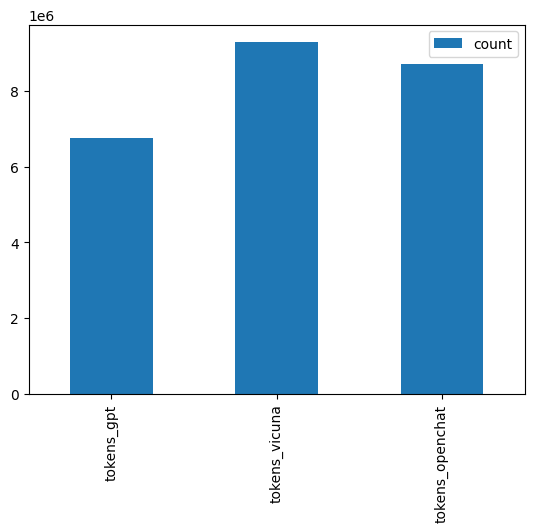

In [ ]:
pd.DataFrame(teste_copy[['tokens_gpt', 'tokens_vicuna', 'tokens_openchat']].sum(), columns=['count']).plot.bar()